
# Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, StratifiedKFold, 
                                     cross_val_score, RandomizedSearchCV)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (confusion_matrix, classification_report, 
                             roc_curve, auc, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score)
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from scipy import stats

# Load data

In [75]:



df = pd.read_csv('cleaned_data_project3.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nFirst few rows:")
print(df.head())

Dataset shape: (77073, 26)

Column names:
['y', 'x9', 'x10', 'x11', 'x12', 'x13', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x28', 'x6', 'x25_L_C', 'x26_PT', 'x3_Male', 'x14_1', 'x14_2', 'x14_3', 'x14_4', 'x14_5']

First few rows:
   y  x9  x10  x11  x12  x13  x15  x16  x17  x18  ...  x28  x6  x25_L_C  \
0  1   5    5    5    4    3    3    3    4    5  ...    1  50        0   
1  1   1    1    1    1    3    1    4    4    4  ...    1  44        1   
2  0   3    1    5    5    3    2    3    3    3  ...    3  72        1   
3  0   1    3    1    3    5    5    5    2    4  ...    3  38        1   
4  1   5    5    5    5    2    5    4    4    4  ...    1  37        1   

   x26_PT  x3_Male  x14_1  x14_2  x14_3  x14_4  x14_5  
0       0        0      0      0      0      0      1  
1       0        0      0      0      1      0      0  
2       0        0      0      1      0      0      0  
3       1        0      1      0      0      0      0  
4       0 

# Data Cleaning and Preprocessing

In [76]:


# %%
print("="*50)
print("DATA CLEANING")
print("="*50)

# Check data types
print("\nData types:")
print(df.dtypes)

DATA CLEANING

Data types:
y            int64
x9           int64
x10          int64
x11          int64
x12          int64
x13          int64
x15          int64
x16          int64
x17          int64
x18          int64
x19          int64
x20          int64
x21          int64
x22          int64
x23          int64
x24        float64
x28          int64
x6           int64
x25_L_C      int64
x26_PT       int64
x3_Male      int64
x14_1        int64
x14_2        int64
x14_3        int64
x14_4        int64
x14_5        int64
dtype: object


# Check missing values

In [77]:

print("\nMissing values:")
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_df[missing_df['Missing_Count'] > 0])


Missing values:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []


# Check for duplicates

In [78]:

print("\n" + "="*50)
print("CHECKING FOR DUPLICATES")
print("="*50)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")
    print(f"New shape: {df.shape}")


CHECKING FOR DUPLICATES
Number of duplicate rows: 227
Removed 227 duplicate rows
New shape: (76846, 26)


# Basic statistics

In [79]:

print("\n" + "="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)
print(df.describe())


DESCRIPTIVE STATISTICS
                  y            x9           x10           x11           x12  \
count  76846.000000  76846.000000  76846.000000  76846.000000  76846.000000   
mean       0.458254      2.751581      3.061669      2.763267      2.973024   
std        0.498257      1.346852      1.532933      1.408817      1.279940   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      2.000000      2.000000      2.000000      2.000000   
50%        0.000000      3.000000      3.000000      3.000000      3.000000   
75%        1.000000      4.000000      4.000000      4.000000      4.000000   
max        1.000000      5.000000      5.000000      5.000000      5.000000   

                x13           x15           x16           x17           x18  \
count  76846.000000  76846.000000  76846.000000  76846.000000  76846.000000   
mean       3.225321      3.461286      3.385954      3.411694      3.360214   
std        1.326809      1.

# ## 3. Data Visualization

In [80]:




print("="*50)
print("TARGET VARIABLE DISTRIBUTION")
print("="*50)

# Target distribution
target_counts = df['y'].value_counts()
print(f"\nTarget distribution:\n{target_counts}")
print(f"\nTarget proportions:\n{df['y'].value_counts(normalize=True)}")




TARGET VARIABLE DISTRIBUTION

Target distribution:
0    41631
1    35215
Name: y, dtype: int64

Target proportions:
0    0.541746
1    0.458254
Name: y, dtype: float64


# Distribution of numerical features


FEATURE DISTRIBUTIONS


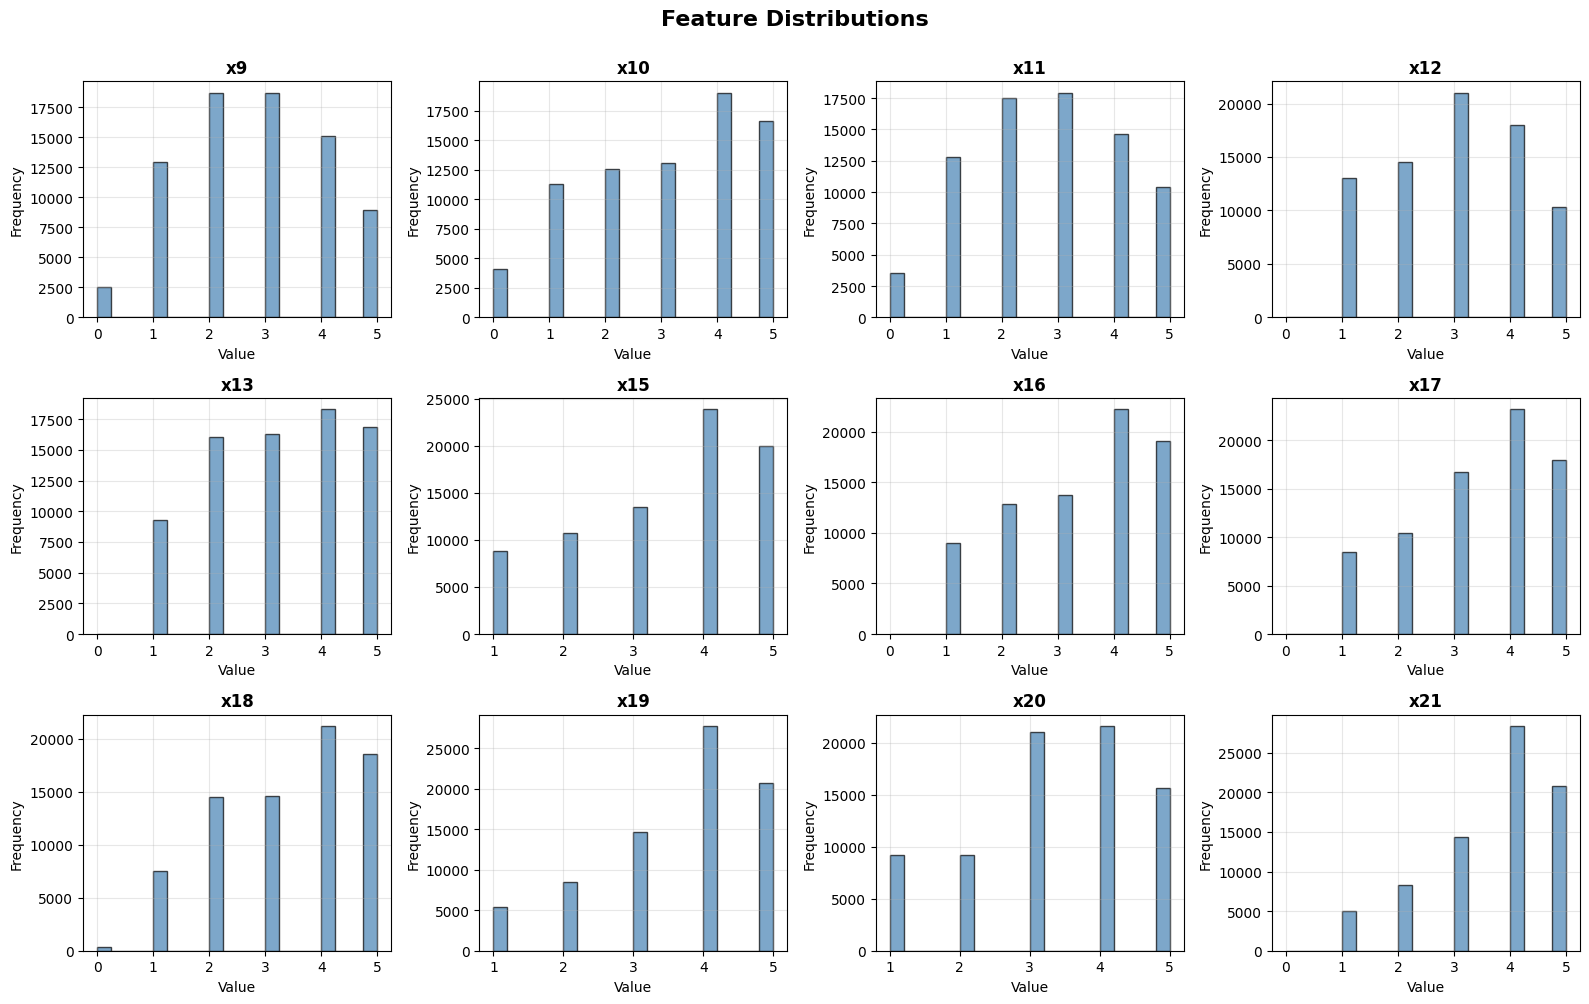

In [ ]:
# %%

print("\n" + "="*50)
print("FEATURE DISTRIBUTIONS")
print("="*50)

# Select numerical features
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'y' in num_features:
    num_features.remove('y')

# Plot distributions (first 12 features)
n_features = min(12, len(num_features))
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(num_features[:n_features]):
    axes[idx].hist(df[col], bins=20, color='steelblue', alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'{col}', fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Remove empty subplots
for idx in range(n_features, 12):
    fig.delaxes(axes[idx])

plt.suptitle('Feature Distributions', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Target distribution


Target distribution:
0    41631
1    35215
Name: y, dtype: int64

Target proportions:
0    0.541746
1    0.458254
Name: y, dtype: float64


[Text(0, 0, '0'), Text(1, 0, '1')]

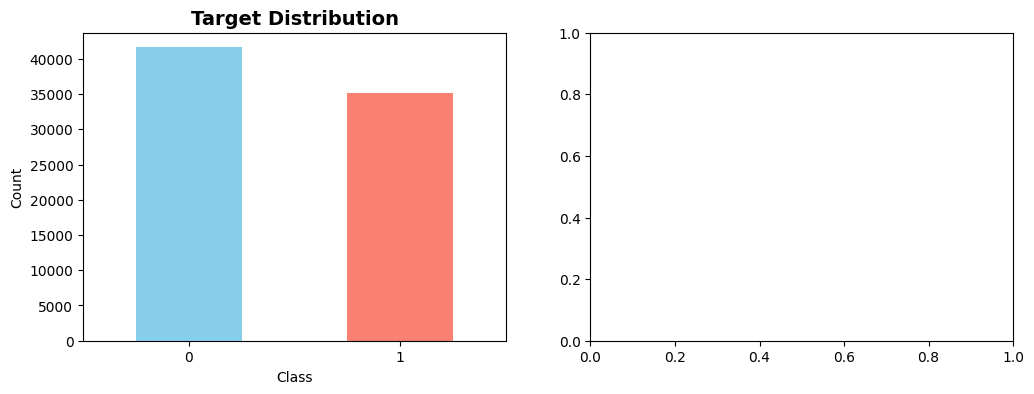

In [81]:

target_counts = df['y'].value_counts()
print(f"\nTarget distribution:\n{target_counts}")
print(f"\nTarget proportions:\n{df['y'].value_counts(normalize=True)}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Target Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Correlation matrix


CORRELATION ANALYSIS

Correlation with target variable:
x14_5      0.437829
x16        0.393136
x15        0.338777
x17        0.317867
x18        0.311059
x22        0.294829
x9         0.280673
x14_4      0.246792
x19        0.236216
x21        0.231376
x20        0.217660
x13        0.193465
x25_L_C    0.191853
x11        0.173031
x6         0.131575
x3_Male    0.013389
x12        0.001570
x23       -0.015941
x10       -0.051840
x24       -0.066777
x14_1     -0.202213
x14_2     -0.295454
x14_3     -0.317619
x26_PT    -0.455254
x28       -0.492450
dtype: float64


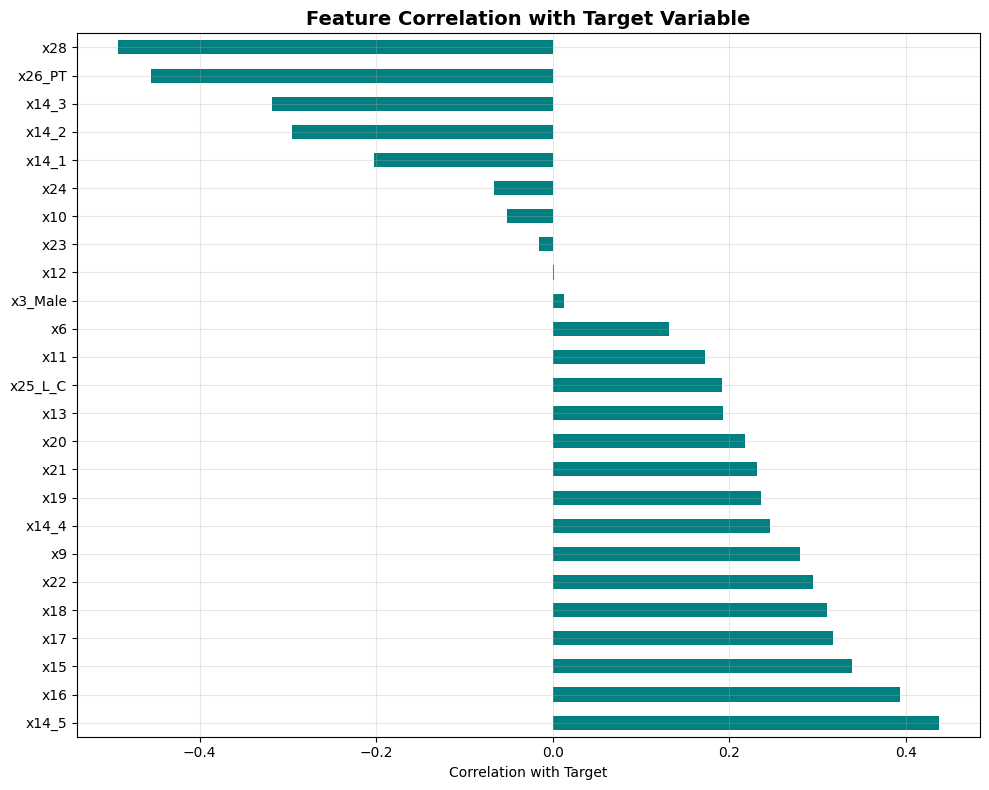

In [ ]:
# %%

print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Calculate correlation with target
correlation_with_target = df[num_features].corrwith(df['y']).sort_values(ascending=False)
print("\nCorrelation with target variable:")
print(correlation_with_target)

# Plot correlation with target
plt.figure(figsize=(10, 8))
correlation_with_target.plot(kind='barh', color='teal')
plt.xlabel('Correlation with Target')
plt.title('Feature Correlation with Target Variable', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Full correlation heatmap

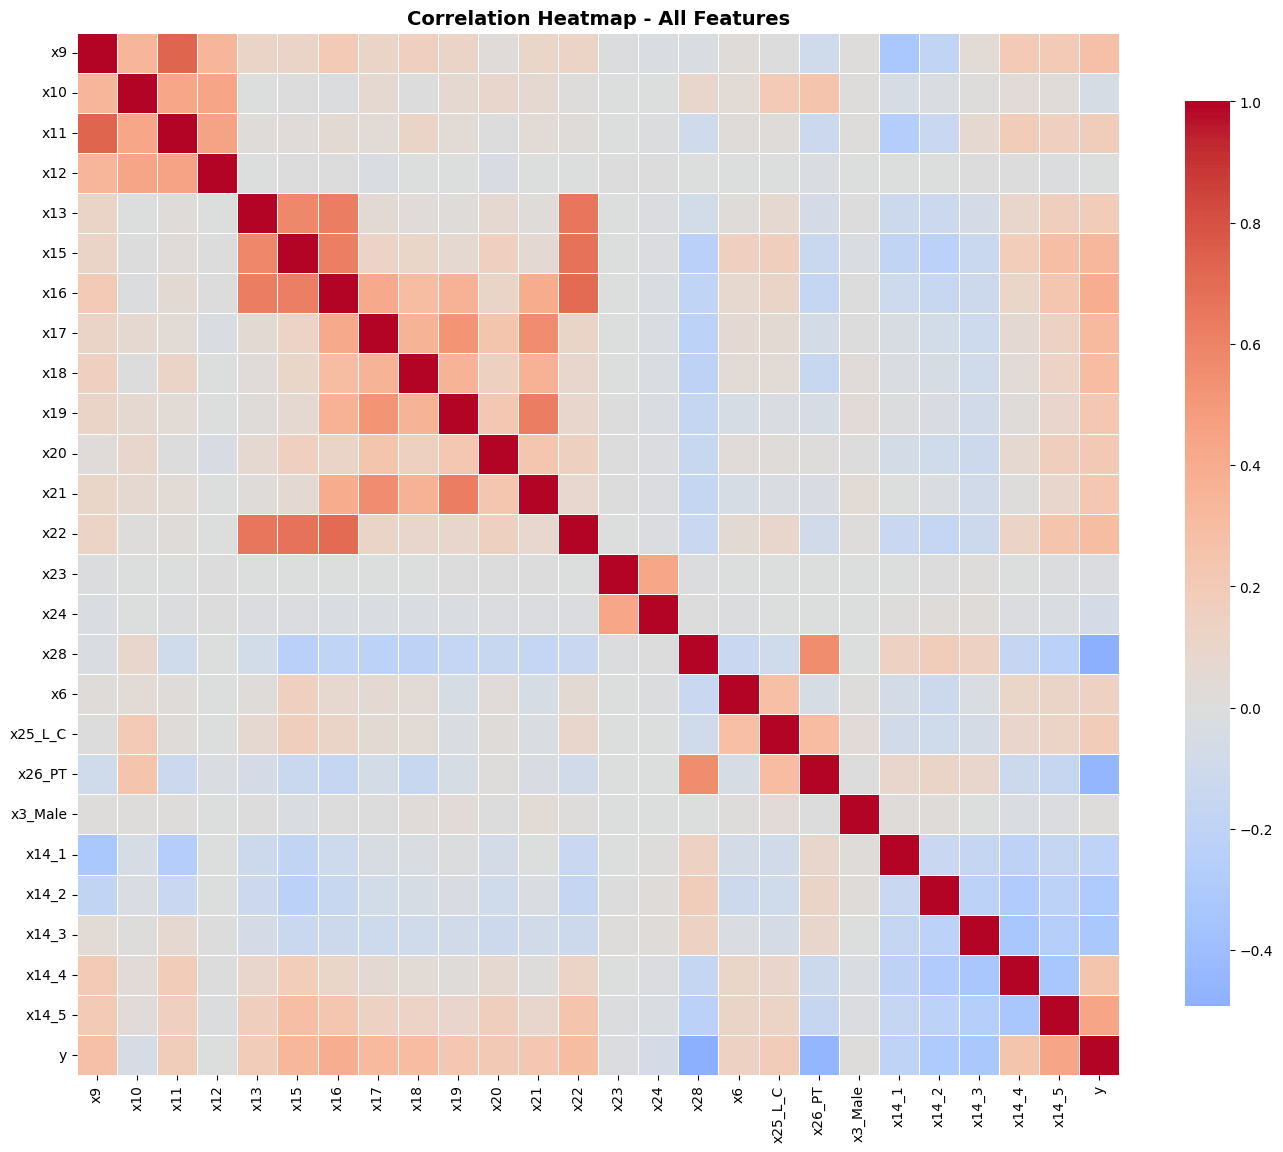

In [ ]:

plt.figure(figsize=(14, 12))
corr_matrix = df[num_features + ['y']].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - All Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [84]:
# Identify highly correlated features (multicollinearity check)
print("\nHighly correlated feature pairs (|correlation| > 0.7):")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature1': corr_matrix.columns[i],
                'Feature2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print(high_corr_df)
else:
    print("No highly correlated features found")


Highly correlated feature pairs (|correlation| > 0.7):
  Feature1 Feature2  Correlation
0       x9      x11     0.730862
1      x16      x22     0.704729



FEATURE DISTRIBUTIONS BY TARGET CLASS


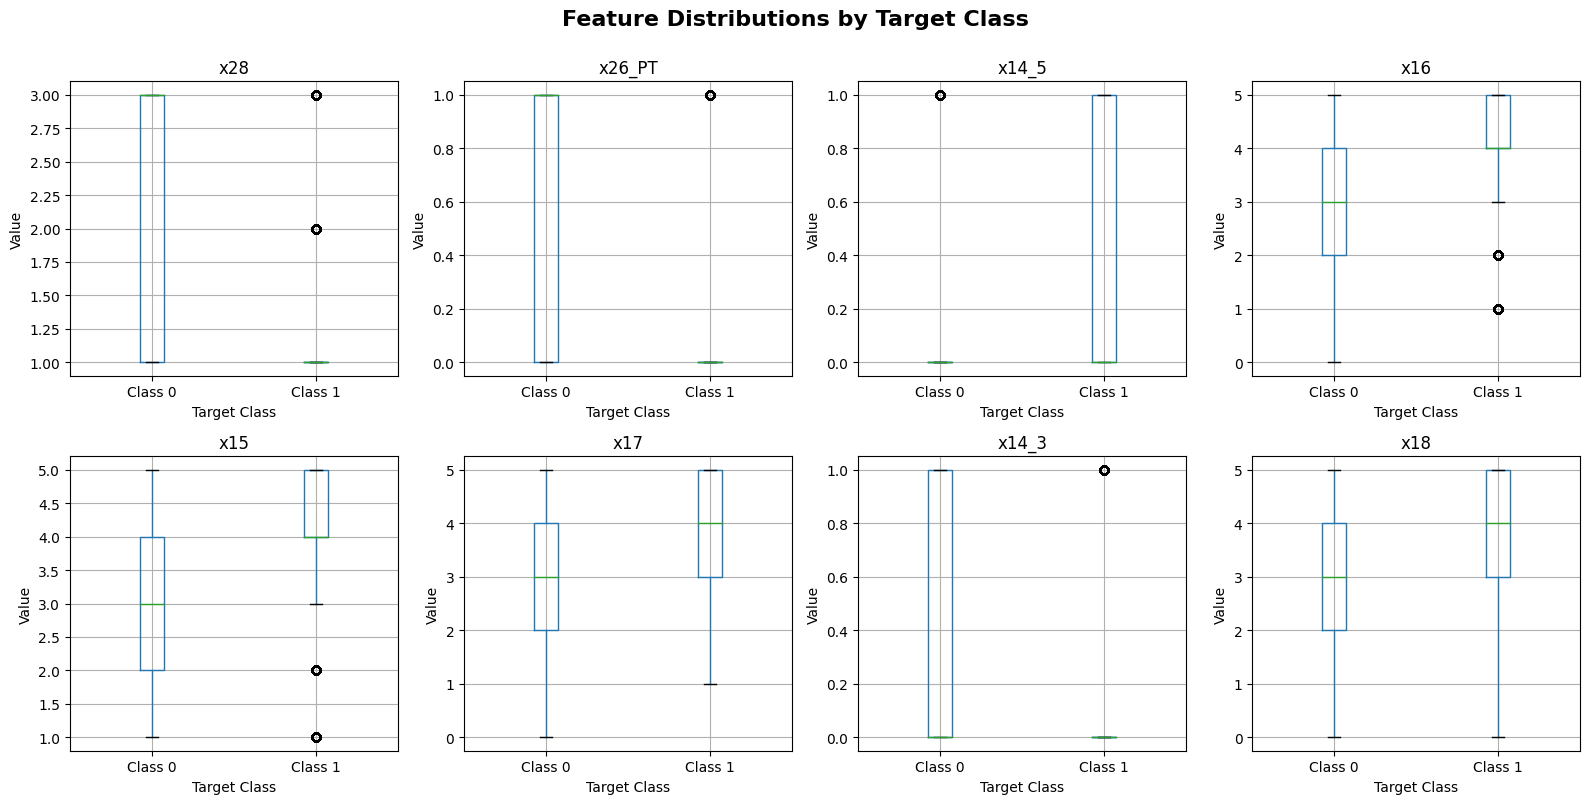

In [85]:
# %%
# Box plots for key features by target class
print("\n" + "="*50)
print("FEATURE DISTRIBUTIONS BY TARGET CLASS")
print("="*50)

# Select top correlated features
top_features = correlation_with_target.abs().sort_values(ascending=False).head(8).index.tolist()

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    df.boxplot(column=feature, by='y', ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Target Class')
    axes[idx].set_ylabel('Value')
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['Class 0', 'Class 1'])

plt.suptitle('Feature Distributions by Target Class', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [86]:
# ## 4. Data Splitting

# %%
print("="*50)
print("DATA SPLITTING")
print("="*50)

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Split: 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nClass distribution in each set:")
print(f"Training: {dict(y_train.value_counts())}")
print(f"Validation: {dict(y_val.value_counts())}")
print(f"Test: {dict(y_test.value_counts())}")

DATA SPLITTING

Training set: 46107 samples (60.0%)
Validation set: 15369 samples (20.0%)
Test set: 15370 samples (20.0%)

Class distribution in each set:
Training: {0: 24978, 1: 21129}
Validation: {0: 8326, 1: 7043}
Test: {0: 8327, 1: 7043}


In [87]:
# For tree-based models, we'll use unscaled data
X_train_tree = X_train.values
X_val_tree = X_val.values
X_test_tree = X_test.values

In [88]:
# ## 6. Model 1: Random Forest
# 
# ### Techniques to prevent overfitting:
# - Limit max_depth
# - Increase min_samples_split and min_samples_leaf
# - Use max_features to add randomness
# - Cross-validation for hyperparameter tuning

# %%
print("="*70)
print("MODEL 1: RANDOM FOREST")
print("="*70)

# Baseline Random Forest
print("\n[1] Training Baseline Random Forest...")
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_baseline.fit(X_train_tree, y_train)

# Evaluate baseline
y_train_pred_rf = rf_baseline.predict(X_train_tree)
y_val_pred_rf = rf_baseline.predict(X_val_tree)
y_test_pred_rf = rf_baseline.predict(X_test_tree)

train_auc_rf = roc_auc_score(y_train, rf_baseline.predict_proba(X_train_tree)[:, 1])
val_auc_rf = roc_auc_score(y_val, rf_baseline.predict_proba(X_val_tree)[:, 1])
test_auc_rf = roc_auc_score(y_test, rf_baseline.predict_proba(X_test_tree)[:, 1])

print(f"\nBaseline Random Forest Results:")
print(f"Training AUC:   {train_auc_rf:.4f}")
print(f"Validation AUC: {val_auc_rf:.4f}")
print(f"Test AUC:       {test_auc_rf:.4f}")
print(f"Overfit check:  {train_auc_rf - test_auc_rf:.4f}")


MODEL 1: RANDOM FOREST

[1] Training Baseline Random Forest...

Baseline Random Forest Results:
Training AUC:   1.0000
Validation AUC: 0.9926
Test AUC:       0.9931
Overfit check:  0.0069


In [89]:
# %%
# Hyperparameter tuning with RandomizedSearchCV
print("\n[2] Hyperparameter Tuning with RandomizedSearchCV...")

# Parameter grid - focused on preventing overfitting
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5, 0.7],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_random = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf,
    n_iter=50, cv=5, scoring='roc_auc',
    random_state=42, n_jobs=-1, verbose=1
)

rf_random.fit(X_train_tree, y_train)

print(f"\nBest parameters: {rf_random.best_params_}")
print(f"Best CV AUC: {rf_random.best_score_:.4f}")



[2] Hyperparameter Tuning with RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:
# Get best model
best_rf = rf_random.best_estimator_

In [ ]:
# Evaluate tuned Random Forest
print("\n[3] Evaluating Tuned Random Forest...")

y_train_pred_rf_tuned = best_rf.predict(X_train_tree)
y_val_pred_rf_tuned = best_rf.predict(X_val_tree)
y_test_pred_rf_tuned = best_rf.predict(X_test_tree)

y_train_proba_rf = best_rf.predict_proba(X_train_tree)[:, 1]
y_val_proba_rf = best_rf.predict_proba(X_val_tree)[:, 1]
y_test_proba_rf = best_rf.predict_proba(X_test_tree)[:, 1]

train_auc_rf_tuned = roc_auc_score(y_train, y_train_proba_rf)
val_auc_rf_tuned = roc_auc_score(y_val, y_val_proba_rf)
test_auc_rf_tuned = roc_auc_score(y_test, y_test_proba_rf)


print(f"\nTuned Random Forest Results:")
print(f"Training AUC:   {train_auc_rf_tuned:.4f}")
print(f"Validation AUC: {val_auc_rf_tuned:.4f}")
print(f"Test AUC:       {test_auc_rf_tuned:.4f}")
print(f"Overfit check:  {train_auc_rf_tuned - test_auc_rf_tuned:.4f}")

if abs(train_auc_rf_tuned - test_auc_rf_tuned) < 0.05:
    print(" Good! Low overfitting")
elif abs(train_auc_rf_tuned - test_auc_rf_tuned) < 0.10:
    print("Moderate overfitting")
else:
    print(" High overfitting detected!")


[3] Evaluating Tuned Random Forest...

Tuned Random Forest Results:
Training AUC:   0.9999
Validation AUC: 0.9938
Test AUC:       0.9942
Overfit check:  0.0057
 Good! Low overfitting


# Feature importance from Random Forest


[4] Feature Importance Analysis...

Top 10 Most Important Features:
    Feature  Importance
0        x9    0.213355
15      x28    0.157162
18   x26_PT    0.106297
6       x16    0.082285
24    x14_5    0.060215
17  x25_L_C    0.055207
5       x15    0.048922
2       x11    0.037153
16       x6    0.028613
23    x14_4    0.027103


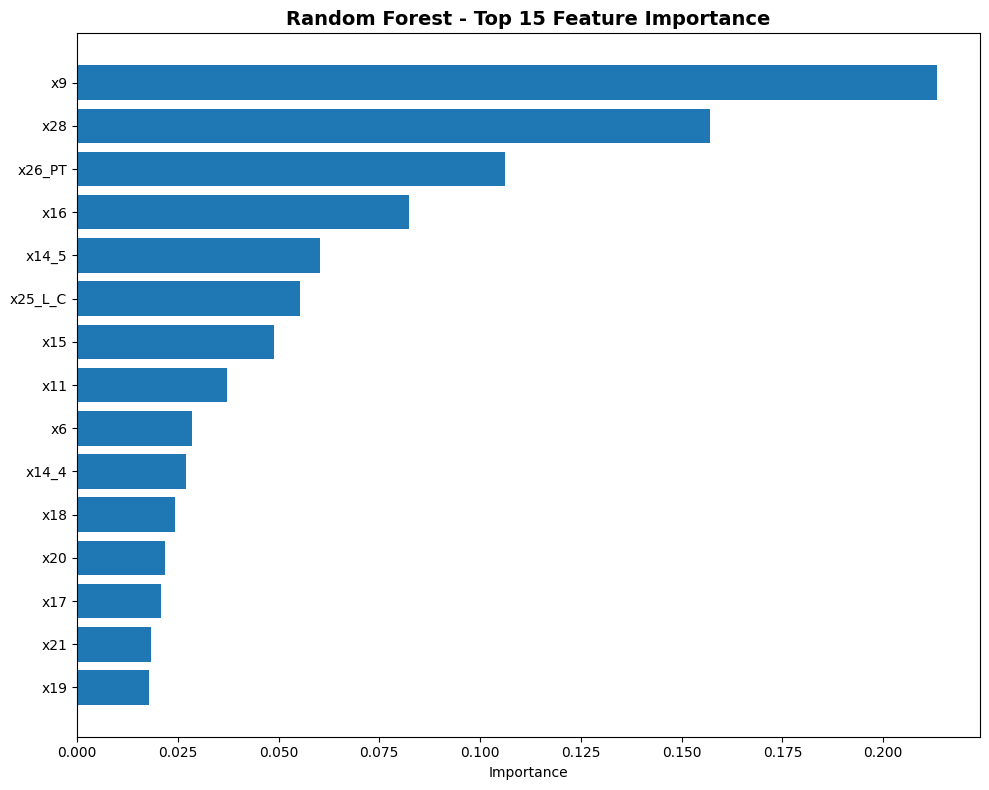

In [90]:

print("\n[4] Feature Importance Analysis...")

feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_rf.head(10))

# Plot feature importance
plt.figure(figsize=(10, 8))
top_features_rf = feature_importance_rf.head(15)
plt.barh(top_features_rf['Feature'], top_features_rf['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest - Top 15 Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ## 7. Model 2: Gradient Boosting (XGBoost)

In [ ]:

# 
# ### Techniques to prevent overfitting:
# - Lower learning_rate
# - Limit max_depth
# - Use subsample and colsample_bytree
# - Early stopping with validation set
# - Regularization (reg_alpha, reg_lambda)

# %%
print("="*70)
print("MODEL 2: XGBoost")
print("="*70)

# Baseline XGBoost
print("\n[1] Training Baseline XGBoost...")
xgb_baseline = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    eval_metric='auc',
    use_label_encoder=False
)
xgb_baseline.fit(X_train_tree, y_train)

# Evaluate baseline
train_auc_xgb = roc_auc_score(y_train, xgb_baseline.predict_proba(X_train_tree)[:, 1])
val_auc_xgb = roc_auc_score(y_val, xgb_baseline.predict_proba(X_val_tree)[:, 1])
test_auc_xgb = roc_auc_score(y_test, xgb_baseline.predict_proba(X_test_tree)[:, 1])

print(f"\nBaseline XGBoost Results:")
print(f"Training AUC:   {train_auc_xgb:.4f}")
print(f"Validation AUC: {val_auc_xgb:.4f}")
print(f"Test AUC:       {test_auc_xgb:.4f}")
print(f"Overfit check:  {train_auc_xgb - test_auc_xgb:.4f}")

MODEL 2: XGBoost

[1] Training Baseline XGBoost...


c:\Users\rohan\anaconda3\envs\sensor\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Baseline XGBoost Results:
Training AUC:   0.9986
Validation AUC: 0.9940
Test AUC:       0.9941
Overfit check:  0.0045


In [ ]:
# Hyperparameter tuning with early stopping
print("\n[2] Hyperparameter Tuning with RandomizedSearchCV and Early Stopping...")

param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1],
    'scale_pos_weight': [1, 2, 3]
}

xgb_model = xgb.XGBClassifier(
    random_state=42,
    eval_metric='auc',
    use_label_encoder=False
)

xgb_random = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist_xgb,
    n_iter=50, cv=5, scoring='roc_auc',
    random_state=42, n_jobs=-1, verbose=1
)

xgb_random.fit(X_train_tree, y_train)

print(f"\nBest parameters: {xgb_random.best_params_}")
print(f"Best CV AUC: {xgb_random.best_score_:.4f}")

best_xgb = xgb_random.best_estimator_

In [ ]:
# Train final XGBoost with early stopping
print("\n[3] Training Final XGBoost with Early Stopping...")

final_xgb = xgb.XGBClassifier(
    **xgb_random.best_params_,
    random_state=42,
    eval_metric='auc',
    use_label_encoder=False,
    early_stopping_rounds=20
)

final_xgb.fit(
    X_train_tree, y_train,
    eval_set=[(X_val_tree, y_val)],
    verbose=False
)


[3] Training Final XGBoost with Early Stopping...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
# Evaluate tuned XGBoost
print("\n[4] Evaluating Tuned XGBoost...")

y_train_proba_xgb = final_xgb.predict_proba(X_train_tree)[:, 1]
y_val_proba_xgb = final_xgb.predict_proba(X_val_tree)[:, 1]
y_test_proba_xgb = final_xgb.predict_proba(X_test_tree)[:, 1]

train_auc_xgb_tuned = roc_auc_score(y_train, y_train_proba_xgb)
val_auc_xgb_tuned = roc_auc_score(y_val, y_val_proba_xgb)
test_auc_xgb_tuned = roc_auc_score(y_test, y_test_proba_xgb)

print(f"\nTuned XGBoost Results:")
print(f"Training AUC:   {train_auc_xgb_tuned:.4f}")
print(f"Validation AUC: {val_auc_xgb_tuned:.4f}")
print(f"Test AUC:       {test_auc_xgb_tuned:.4f}")
print(f"Overfit check:  {train_auc_xgb_tuned - test_auc_xgb_tuned:.4f}")

if abs(train_auc_xgb_tuned - test_auc_xgb_tuned) < 0.05:
    print(" Good! Low overfitting")
elif abs(train_auc_xgb_tuned - test_auc_xgb_tuned) < 0.10:
    print(" Moderate overfitting")
else:
    print("High overfitting detected!")


[4] Evaluating Tuned XGBoost...

Tuned XGBoost Results:
Training AUC:   0.9976
Validation AUC: 0.9942
Test AUC:       0.9942
Overfit check:  0.0034
 Good! Low overfitting



[5] Feature Importance Analysis...

Top 10 Most Important Features:
    Feature  Importance
18   x26_PT    0.223802
24    x14_5    0.141174
0        x9    0.122120
6       x16    0.083850
17  x25_L_C    0.067695
15      x28    0.054950
23    x14_4    0.046310
22    x14_3    0.033907
2       x11    0.029100
5       x15    0.028600


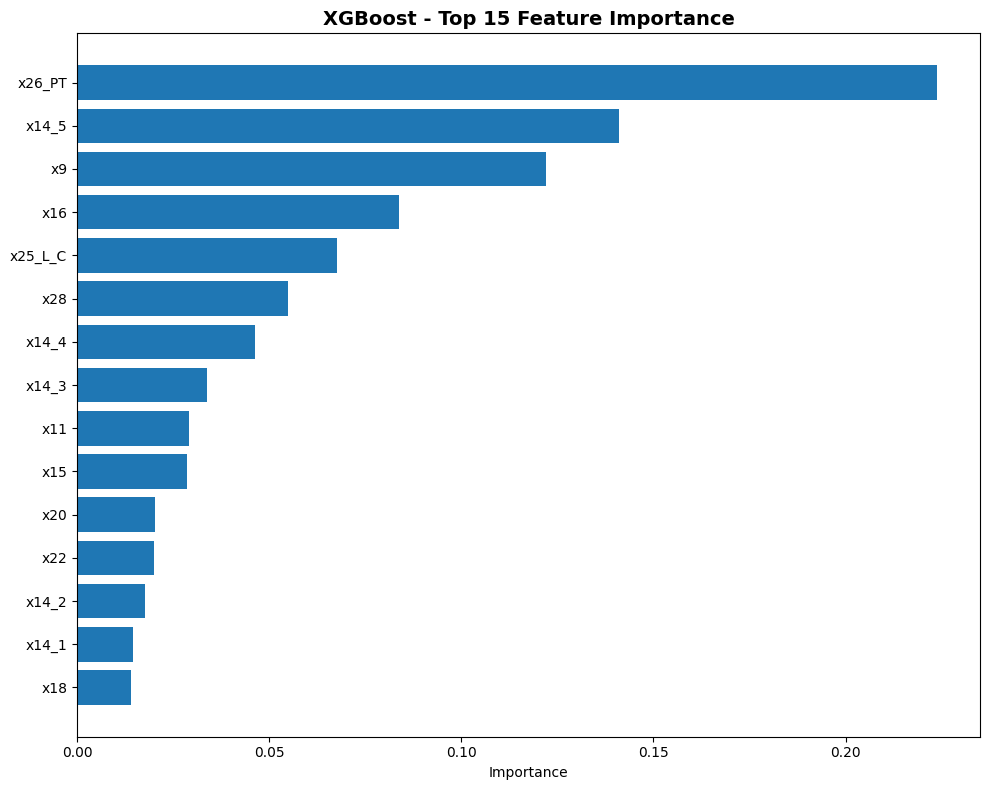

In [ ]:
# Feature importance from XGBoost
print("\n[5] Feature Importance Analysis...")

feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_xgb.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_xgb.head(10))

# Plot feature importance
plt.figure(figsize=(10, 8))
top_features_xgb = feature_importance_xgb.head(15)
plt.barh(top_features_xgb['Feature'], top_features_xgb['Importance'])
plt.xlabel('Importance')
plt.title('XGBoost - Top 15 Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ## 8. Model 3: LightGBM

In [ ]:

# 
# ### Techniques to prevent overfitting:
# - num_leaves control (instead of max_depth)
# - min_data_in_leaf
# - feature_fraction and bagging_fraction
# - lambda_l1 and lambda_l2 regularization

# %%
print("="*70)
print("MODEL 3: LightGBM")
print("="*70)

# Baseline LightGBM
print("\n[1] Training Baseline LightGBM...")
lgb_baseline = lgb.LGBMClassifier(
    n_estimators=100,
    random_state=42,
    verbose=-1
)
lgb_baseline.fit(X_train_tree, y_train)

# Evaluate baseline
train_auc_lgb = roc_auc_score(y_train, lgb_baseline.predict_proba(X_train_tree)[:, 1])
val_auc_lgb = roc_auc_score(y_val, lgb_baseline.predict_proba(X_val_tree)[:, 1])
test_auc_lgb = roc_auc_score(y_test, lgb_baseline.predict_proba(X_test_tree)[:, 1])

print(f"\nBaseline LightGBM Results:")
print(f"Training AUC:   {train_auc_lgb:.4f}")
print(f"Validation AUC: {val_auc_lgb:.4f}")
print(f"Test AUC:       {test_auc_lgb:.4f}")
print(f"Overfit check:  {train_auc_lgb - test_auc_lgb:.4f}")

MODEL 3: LightGBM

[1] Training Baseline LightGBM...

Baseline LightGBM Results:
Training AUC:   0.9964
Validation AUC: 0.9945
Test AUC:       0.9946
Overfit check:  0.0018


In [ ]:
#  Hyperparameter tuning
print("\n[2] Hyperparameter Tuning with RandomizedSearchCV...")

param_dist_lgb = {
    'n_estimators': [100, 200, 300, 500],
    'num_leaves': [15, 31, 63, 127],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'feature_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
    'bagging_freq': [0, 3, 5, 7],
    'min_child_samples': [5, 10, 20, 30],
    'lambda_l1': [0, 0.01, 0.1, 1],
    'lambda_l2': [0, 0.01, 0.1, 1],
    'class_weight': [None, 'balanced']
}

lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)

lgb_random = RandomizedSearchCV(
    lgb_model, param_distributions=param_dist_lgb,
    n_iter=20, cv=5, scoring='roc_auc',
    random_state=42, n_jobs=-1, verbose=1
)

lgb_random.fit(X_train_tree, y_train)

print(f"\nBest parameters: {lgb_random.best_params_}")
print(f"Best CV AUC: {lgb_random.best_score_:.4f}")

best_lgb = lgb_random.best_estimator_

# %%
# Evaluate tuned LightGBM
print("\n[3] Evaluating Tuned LightGBM...")

y_train_proba_lgb = best_lgb.predict_proba(X_train_tree)[:, 1]
y_val_proba_lgb = best_lgb.predict_proba(X_val_tree)[:, 1]
y_test_proba_lgb = best_lgb.predict_proba(X_test_tree)[:, 1]

train_auc_lgb_tuned = roc_auc_score(y_train, y_train_proba_lgb)
val_auc_lgb_tuned = roc_auc_score(y_val, y_val_proba_lgb)
test_auc_lgb_tuned = roc_auc_score(y_test, y_test_proba_lgb)

print(f"\nTuned LightGBM Results:")
print(f"Training AUC:   {train_auc_lgb_tuned:.4f}")
print(f"Validation AUC: {val_auc_lgb_tuned:.4f}")
print(f"Test AUC:       {test_auc_lgb_tuned:.4f}")
print(f"Overfit check:  {train_auc_lgb_tuned - test_auc_lgb_tuned:.4f}")

if abs(train_auc_lgb_tuned - test_auc_lgb_tuned) < 0.05:
    print("Good! Low overfitting")
elif abs(train_auc_lgb_tuned - test_auc_lgb_tuned) < 0.10:
    print("Moderate overfitting")
else:
    print("High overfitting detected!")



[2] Hyperparameter Tuning with RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters: {'num_leaves': 63, 'n_estimators': 100, 'min_child_samples': 10, 'max_depth': 15, 'learning_rate': 0.05, 'lambda_l2': 0, 'lambda_l1': 0, 'feature_fraction': 1.0, 'class_weight': 'balanced', 'bagging_freq': 5, 'bagging_fraction': 1.0}
Best CV AUC: 0.9941

[3] Evaluating Tuned LightGBM...

Tuned LightGBM Results:
Training AUC:   0.9961
Validation AUC: 0.9944
Test AUC:       0.9945
Overfit check:  0.0016
Good! Low overfitting


In [ ]:
# Feature importance from LightGBM
print("\n[4] Feature Importance Analysis...")

feature_importance_lgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_lgb.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_lgb)


[4] Feature Importance Analysis...

Top 10 Most Important Features:
    Feature  Importance
0        x9        1116
16       x6         557
17  x25_L_C         441
9       x19         394
18   x26_PT         357
5       x15         337
10      x20         333
11      x21         329
3       x12         308
7       x17         247
6       x16         241
15      x28         209
8       x18         207
12      x22         204
24    x14_5         178
1       x10         145
14      x24         137
23    x14_4          94
2       x11          86
4       x13          74
13      x23          63
20    x14_1          56
22    x14_3          42
21    x14_2          27
19  x3_Male          18


In [ ]:
# Calculate all metrics for all models
# Random Forest
rf_train_acc = accuracy_score(y_train, best_rf.predict(X_train_tree))
rf_val_acc = accuracy_score(y_val, best_rf.predict(X_val_tree))
rf_test_acc = accuracy_score(y_test, best_rf.predict(X_test_tree))

# XGBoost
xgb_train_acc = accuracy_score(y_train, final_xgb.predict(X_train_tree))
xgb_val_acc = accuracy_score(y_val, final_xgb.predict(X_val_tree))
xgb_test_acc = accuracy_score(y_test, final_xgb.predict(X_test_tree))

# LightGBM
lgb_train_acc = accuracy_score(y_train, best_lgb.predict(X_train_tree))
lgb_val_acc = accuracy_score(y_val, best_lgb.predict(X_val_tree))
lgb_test_acc = accuracy_score(y_test, best_lgb.predict(X_test_tree))

In [ ]:
# Create results dataframe
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'Training_AUC': [ train_auc_rf_tuned, train_auc_xgb_tuned, train_auc_lgb_tuned],
    'Validation_AUC': [val_auc_rf_tuned, val_auc_xgb_tuned, val_auc_lgb_tuned],
    'Test_AUC': [test_auc_rf_tuned, test_auc_xgb_tuned, test_auc_lgb_tuned],
    # 'Training_Accuracy': [rf_train_acc, xgb_train_acc, lgb_train_acc],
    # 'Validation_Accuracy': [ rf_val_acc, xgb_val_acc, lgb_val_acc],
    # 'Test_Accuracy': [ rf_test_acc, xgb_test_acc, lgb_test_acc]
})

In [ ]:
##Store the results ino excel
logistic_results_df=pd.read_excel('logistic_regression_results.xlsx')
df=pd.concat([logistic_results_df,results_df])
df.to_excel('Roc_Auc_scores.xlsx')

(0.5, 1.0)

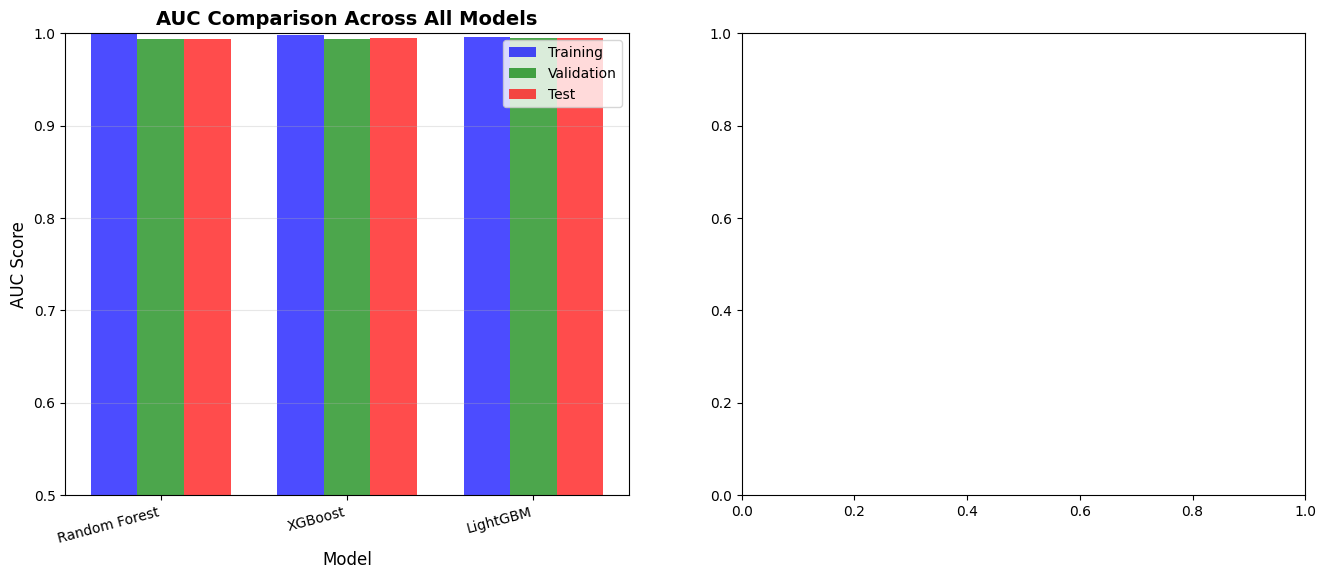

In [94]:
# Plot AUC comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# AUC Comparison
x_labels = results_df['Model']
x_pos = np.arange(len(x_labels))
width = 0.25

axes[0].bar(x_pos - width, results_df['Training_AUC'], width, label='Training', color='blue', alpha=0.7)
axes[0].bar(x_pos, results_df['Validation_AUC'], width, label='Validation', color='green', alpha=0.7)
axes[0].bar(x_pos + width, results_df['Test_AUC'], width, label='Test', color='red', alpha=0.7)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('AUC Score', fontsize=12)
axes[0].set_title('AUC Comparison Across All Models', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(x_labels, rotation=15, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0.5, 1.0])

# CONFUSION MATRICES FOR ALL 3 MODELS (TEST SET)

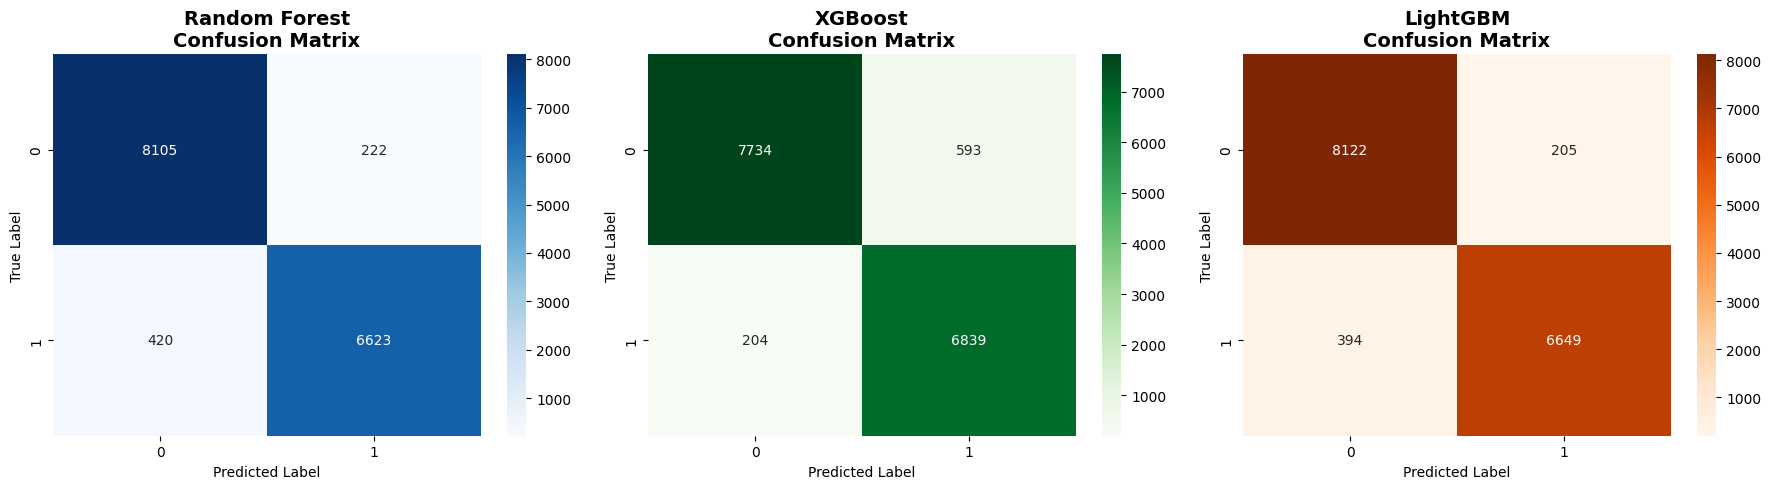

Text(0.5, 28.999999999999986, 'Predicted Label')

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Random Forest
y_test_pred_rf = best_rf.predict(X_test_tree)
cm_rf = confusion_matrix(y_test, y_test_pred_rf) # Random Forest
y_test_pred_rf = best_rf.predict(X_test_tree)
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=True)
axes[0].set_title('Random Forest\nConfusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# XGBoost
y_test_pred_xgb = final_xgb.predict(X_test_tree)
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=True)
axes[1].set_title('XGBoost\nConfusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

# LightGBM
y_test_pred_lgb = best_lgb.predict(X_test_tree)
cm_lgb = confusion_matrix(y_test, y_test_pred_lgb)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Oranges', ax=axes[2], cbar=True)
axes[2].set_title('LightGBM\nConfusion Matrix', fontsize=14, fontweight='bold')
axes[2].set_ylabel('True Label')
axes[2].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=True)
axes[0].set_title('Random Forest\nConfusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# CLASSIFICATION REPORTS FOR ALL 3 MODELS

In [99]:
print("="*70)
print("CLASSIFICATION REPORTS (TEST SET)")
print("="*70)

print("\n" + "-"*70)
print("RANDOM FOREST")
print("-"*70)
print(classification_report(y_test, y_test_pred_rf))

print("\n" + "-"*70)
print("XGBOOST")
print("-"*70)
print(classification_report(y_test, y_test_pred_xgb))

print("\n" + "-"*70)
print("LIGHTGBM")
print("-"*70)
print(classification_report(y_test, y_test_pred_lgb))

CLASSIFICATION REPORTS (TEST SET)

----------------------------------------------------------------------
RANDOM FOREST
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8327
           1       0.97      0.94      0.95      7043

    accuracy                           0.96     15370
   macro avg       0.96      0.96      0.96     15370
weighted avg       0.96      0.96      0.96     15370


----------------------------------------------------------------------
XGBOOST
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8327
           1       0.92      0.97      0.94      7043

    accuracy                           0.95     15370
   macro avg       0.95      0.95      0.95     15370
weighted avg       0.95      0.95      0.95     15370


---

# ROC CURVES FOR ALL 3 MODELS (TEST SET) - COMBINED PLOT

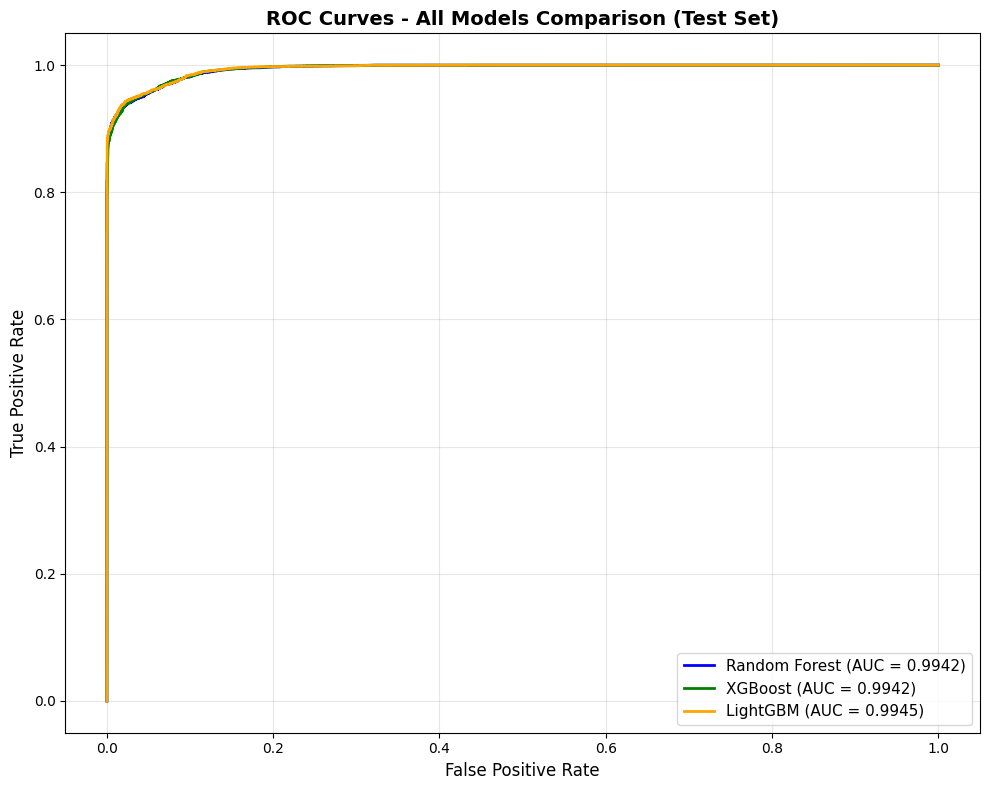

In [101]:
# Calculate ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_test_proba_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot combined ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, 
         label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, 
         label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot(fpr_lgb, tpr_lgb, color='orange', lw=2, 
         label=f'LightGBM (AUC = {roc_auc_lgb:.4f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, 
#          label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models Comparison (Test Set)', 
          fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# INDIVIDUAL ROC CURVES FOR EACH MODEL

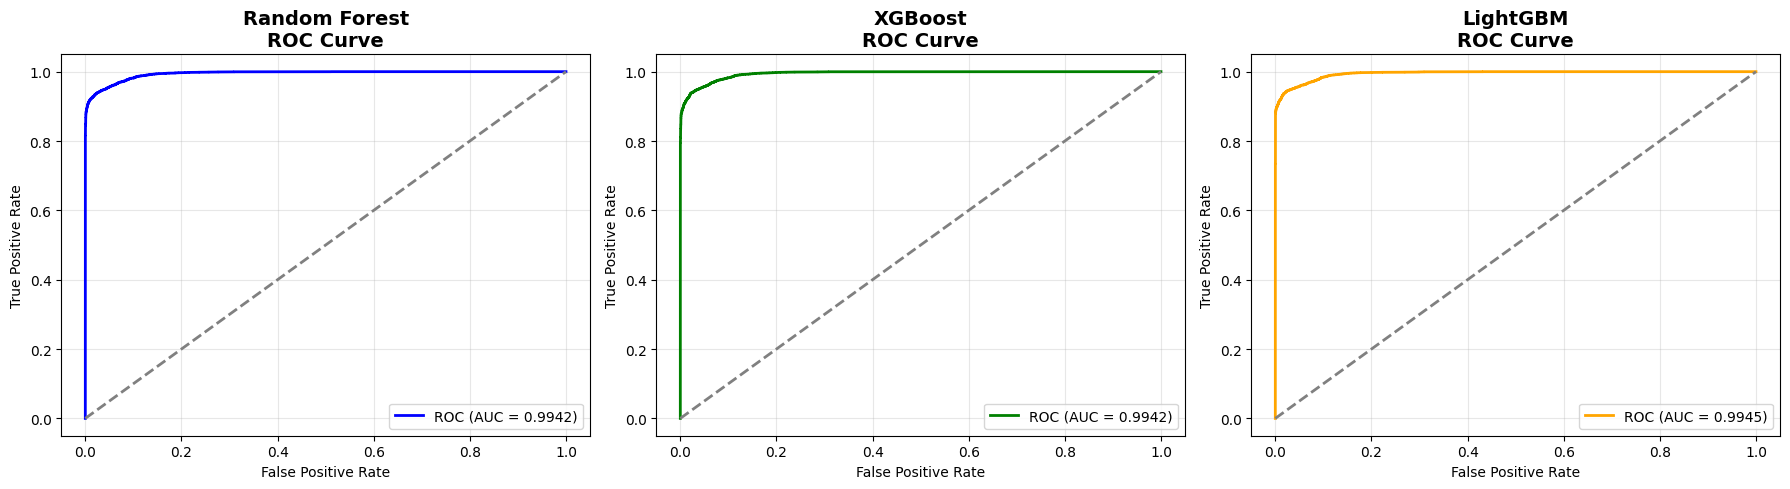

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Random Forest
axes[0].plot(fpr_rf, tpr_rf, color='blue', lw=2, 
             label=f'ROC (AUC = {roc_auc_rf:.4f})')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Random Forest\nROC Curve', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# XGBoost
axes[1].plot(fpr_xgb, tpr_xgb, color='green', lw=2, 
             label=f'ROC (AUC = {roc_auc_xgb:.4f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('XGBoost\nROC Curve', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)

# LightGBM
axes[2].plot(fpr_lgb, tpr_lgb, color='orange', lw=2, 
             label=f'ROC (AUC = {roc_auc_lgb:.4f})')
axes[2].plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('LightGBM\nROC Curve', fontsize=14, fontweight='bold')
axes[2].legend(loc='lower right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()